In [20]:
from cProfile import label
from unittest import result
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from UNet_Fourier_Facilities import UNet_Label_Gen, Fourier_Images
from skimage.io import imread
import os


In [23]:
TRAIN_FILMED_PATH = "D:\\Main\\MA_PROGR\\Data\\Train\\UNet_Train\\water\\filmed"
TRAIN_CLEAN_PATH = "D:\\Main\\MA_PROGR\\Data\\Train\\UNet_Train\\water\\clean_aligned"

train_filmed_imgs = []
train_clean_imgs = []

OFFSET = 400
IMG_WIDTH = 128
IMG_HEIGHT = 128

for addr_filmed in os.listdir(TRAIN_FILMED_PATH):
    img = plt.imread(f"{TRAIN_FILMED_PATH}\{addr_filmed}")
    train_filmed_imgs.append(
        img[OFFSET:IMG_WIDTH+OFFSET, OFFSET:IMG_HEIGHT+OFFSET])

for addr_clean in os.listdir(TRAIN_CLEAN_PATH):
    img = plt.imread(f"{TRAIN_CLEAN_PATH}\{addr_clean}")
    train_clean_imgs.append(
        img[OFFSET:IMG_WIDTH+OFFSET, OFFSET:IMG_HEIGHT+OFFSET])


 ################# NEUE RUNDE ###################


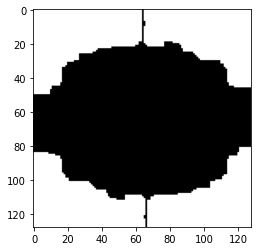

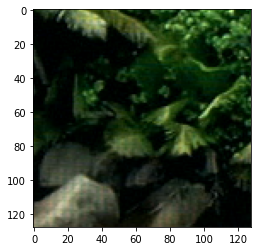

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


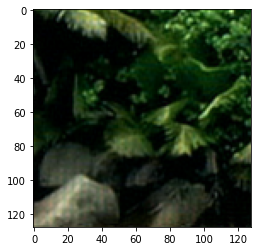

 ################# NEUE RUNDE ###################


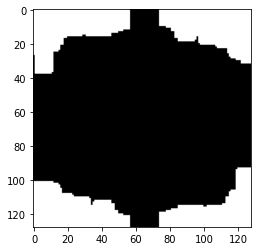

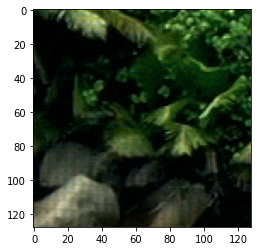

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


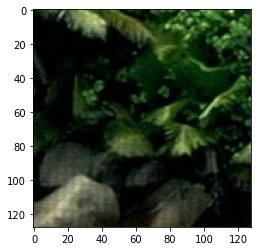

 ################# NEUE RUNDE ###################


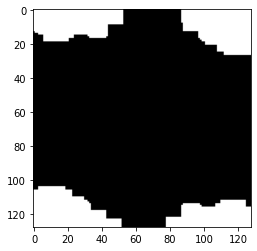

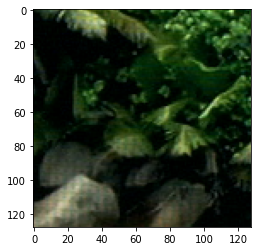

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


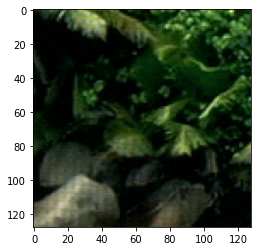

 ################# NEUE RUNDE ###################


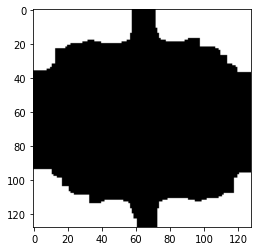

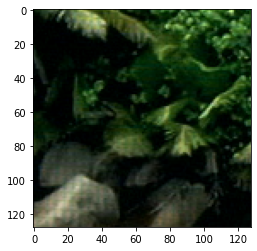

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


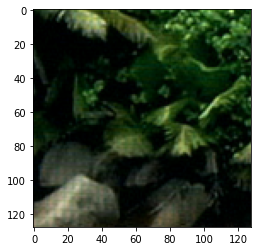

 ################# NEUE RUNDE ###################


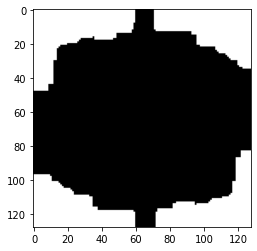

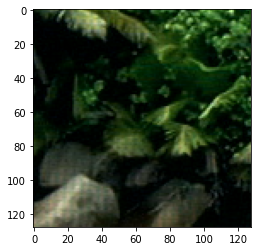

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


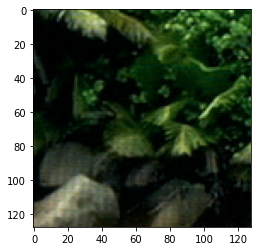

In [24]:
for img_filmed, img_aligned in zip(train_filmed_imgs, train_clean_imgs):

    print(" ################# NEUE RUNDE ###################")
    fourier_handler = Fourier_Images(img_filmed, img_aligned)

    _, _, mask = fourier_handler.generate_mask_from_images()
    processed_image = fourier_handler.replace_masked_sections_and_return_resulting_img()


 
    plt.imshow(mask, cmap="gray")
    plt.show()
    plt.imshow(img_filmed)
    plt.show()
    plt.imshow(processed_image)
    plt.show()
